#**AMALIYOT: yurak kasalligi xavfini bashorat qilish**
#**Vazifa shartlari**

Sizga **Heart Disease Data** dataset beriladi. Bu datasetda bemorlarning turli tibbiy ko‘rsatkichlari (yosh, qon bosimi, xolesterin miqdori va h.k.) mavjud. Maqsad – turli regressiya modellari yordamida **yurak kasalligi (target ustuni)** ehtimolini oldindan bashorat qilish.

#### **1. Ma’lumotlarni yuklash va tahlil qilish**
- **Ma’lumotlarni tozalang**, yetishmayotgan qiymatlar bo‘lsa, ularni to‘g‘rilang.  
- Ustunlar orasidagi **korrelyatsiyani tahlil qiling** va eng muhim omillarni aniqlang.

#### **2. Chiziqli regressiya (Simple Linear Regression)**
- Yurak kasalligi xavfiga eng katta ta’sir ko‘rsatadigan **bitta muhim ustunni** tanlang.  
- Shu ustun asosida **simple linear regression** modeli tuzing.  
- Model natijalarini vizuallashtiring (Matplotlib yoki Seaborn).

#### **3. Ko‘p o‘zgaruvchili regressiya (Multiple Linear Regression)**
- Yurak kasalligi ehtimolini bashorat qilish uchun **bir nechta o‘zgaruvchini tanlang**.  
- **Multiple Linear Regression** modelini qurib, **MSE, R²** kabi baholash mezonlarini hisoblang.  
- Model natijalarini interpretatsiya qiling.

#### **4. Polynomial Regression**
- Yurak kasalligi xavfi va qon bosimi o‘rtasida chiziqli bog‘liqlik yetarli bo‘lmasa, **Polynomial Regression** yordamida bashoratni yaxshilang.  
- **Polynomial darajasini** mos ravishda tanlab, overfitting va underfitting muammolarini tahlil qiling.

#### **5. Non-linear Regression (curve_fit)**
- Yurak kasalligi ehtimolini model qilish uchun nolinear bog‘liqlik mavjudligini aniqlang.  
- `scipy.optimize.curve_fit` funksiyasidan foydalangan holda **eksponensial yoki logaritmik model** tuzing.  
- Modelni baholash uchun **MSE yoki MAE**ʼdan foydalaning.

#### **6. Modelni tanlash va solishtirish**
- Turli regressiya modellarini taqqoslab, **qaysi biri eng yaxshi natija berganini aniqlang**.  

---

### **Bu vazifani bajarish sizga nima beradi?**  
Ushbu vazifa sizga real tibbiy ma’lumotlar bilan ishlash imkoniyatini yaratadi. Regressiya modellarni solishtirib, **qaysi model kasallik xavfini yaxshi bashorat qilishini** aniqlaysiz.  



Ushbu **Heart Disease Data** datasetida quyidagi ustunlar mavjud. Har bir ustunning ma’nosi va qanday turdagi ma’lumot ekanini tushuntirib o‘tamiz:  
---
### **Ustunlar tavsifi**  

| **Ustun nomi**  | **Tavsifi** | **Ma’lumot turi** |
|-----------------|------------|-------------------|
| **age**         | Bemorning yoshi | Raqamli (Integer) |
| **sex**         | Jinsi (Male = erkak, Female = ayol) | String |
| **cp** (Chest Pain Type) | Ko‘krak qafasidagi og‘riq turi: <br> - 1: Typical Angina <br> - 2: Atypical Angina <br> - 3: Non-anginal Pain <br> - 4: Asymptomatic | Nominal (1,2,3,4) |
| **trestbps** (Resting Blood Pressure) | Dam olish vaqtida qon bosimi (mm Hg) | Raqamli |
| **chol** (Cholesterol) | Qondagi umumiy xolesterin miqdori (mg/dl) | Raqamli |
| **fbs** (Fasting Blood Sugar) | Qondagi shakar darajasi (≥ 120 mg/dl bo‘lsa, True, aks holda False) | Boolean (0/1) |
| **restecg** (Resting ECG) | Yurakning elektrokardiogramma natijasi: <br> - 0: Normal <br> - 1: ST-T Wave abnormality <br> - 2: Left Ventricular Hypertrophy | Nominal (0,1,2) |
| **thalach** (Max Heart Rate) | Maksimal yurak urish tezligi | Raqamli |
| **exang** (Exercise-Induced Angina) | Mashq qilish davomida angina bo‘ladimi? (1 = Ha, 0 = Yo‘q) | Boolean (0/1) |
| **oldpeak** | ST depressiyasi: EKG bo‘yicha yurakning dam olish va mashqdan keyingi o‘zgarishi | Raqamli |
| **slope** | ST segmentining tendensiyasi: <br> - 0: Downsloping <br> - 1: Flat <br> - 2: Upsloping | Nominal (0,1,2) |
| **ca** | Tomirlardagi kalsiy miqdori (0–3 oralig‘ida) | Raqamli |
| **thal** | Thalassemia turi: <br> - 1 = Normal <br> - 2 = Fixed defect <br> - 3 = Reversible defect | Nominal (1,2,3) |
| **num** | Yurak kasalligi mavjudligi ([0,1,2,3,4]) | Raqamli |

**num** ustunidagi raqamlar maʼnosi:

| `num` qiymati | Ma’nosi |
|--------------|--------|
| **0**  | Yurak kasalligi yo‘q |
| **1**  | Yengil darajadagi yurak kasalligi |
| **2**  | O‘rta darajadagi yurak kasalligi |
| **3**  | Og‘ir darajadagi yurak kasalligi |
| **4**  | Juda og‘ir yurak kasalligi |



###*** ESLATMA**. *Ushbu amaliy vazifada siz oʻtmagan mavzulardan ham savollar va vazifalar boʻlishi mumkin! Bu savollarni mustaqil oʻrganishingiz kerak boʻladi. Bunday vazifalar mustaqil izlanish koʻnikmangizni oshirish uchun tayyorlandi!*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn


In [ ]:
url = "https://raw.githubusercontent.com/alishermutalov/praktikum-datasets/refs/heads/praktikum/heart_disease_uci_dataset.csv"
df = pd.read_csv(url, index_col='id')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,
1,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
2,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
3,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
4,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
5,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
df['restecg'].value_counts()

,count
restecg,
normal,551
lv hypertrophy,188
st-t abnormality,179


In [ ]:
df['slope'].value_counts()

,count
slope,
flat,345
upsloping,203
downsloping,63


In [ ]:
df['thal'].value_counts()

,count
thal,
normal,196
reversable defect,192
fixed defect,46


In [ ]:
df['fbs'].value_counts()

,count
fbs,
False,692
True,138


### Matnli ustunlarni sonli ustunlarga o'tkazish

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
df_cat = encoder.fit_transform(df[["cp","fbs","restecg","exang","slope","thal","sex"]])
df_cat

array([[ 3.,  1.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  1.,  1.,  1.],
       [ 0.,  0.,  0., ...,  1.,  2.,  1.],
       ...,
       [ 0.,  1.,  2., ..., nan,  0.,  1.],
       [ 0.,  1.,  0., ..., nan, nan,  1.],
       [ 1.,  0.,  0., ..., nan, nan,  1.]])

In [ ]:
df[["cp","fbs","restecg","exang","slope","thal","sex"]] = df_cat.copy()

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,
1,63,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,0.0,0
2,67,1.0,0.0,160.0,286.0,0.0,0.0,108.0,1.0,1.5,1.0,3.0,1.0,2
3,67,1.0,0.0,120.0,229.0,0.0,0.0,129.0,1.0,2.6,1.0,2.0,2.0,1
4,37,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,1.0,0
5,41,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,1.0,0


# Malumotlar bilan ishlash

### Malumotlarni ko'rish

In [ ]:
# javobni shu yerda yozing.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 920 entries, 1 to 920
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    float64
 6   restecg   918 non-null    float64
 7   thalch    865 non-null    float64
 8   exang     865 non-null    float64
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    float64
 11  ca        309 non-null    float64
 12  thal      434 non-null    float64
 13  num       920 non-null    int64  
dtypes: float64(12), int64(2)
memory usage: 107.8 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
count,920.000000,920.000000,920.000000,861.000000,890.000000,830.000000,918.000000,865.000000,865.000000,858.000000,611.000000,309.000000,434.000000,920.000000
mean,53.510870,0.789130,0.782609,132.132404,199.130337,0.166265,0.990196,137.545665,0.389595,0.878788,1.229133,0.676375,1.336406,0.995652
std,9.424685,0.408148,0.956350,19.066070,110.780810,0.372543,0.632552,25.926276,0.487941,1.091226,0.619256,0.935653,0.660472,1.142693
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,175.000000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,140.000000,0.000000,0.500000,1.000000,0.000000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,268.000000,0.000000,1.000000,157.000000,1.000000,1.500000,2.000000,1.000000,2.000000,2.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,4.000000


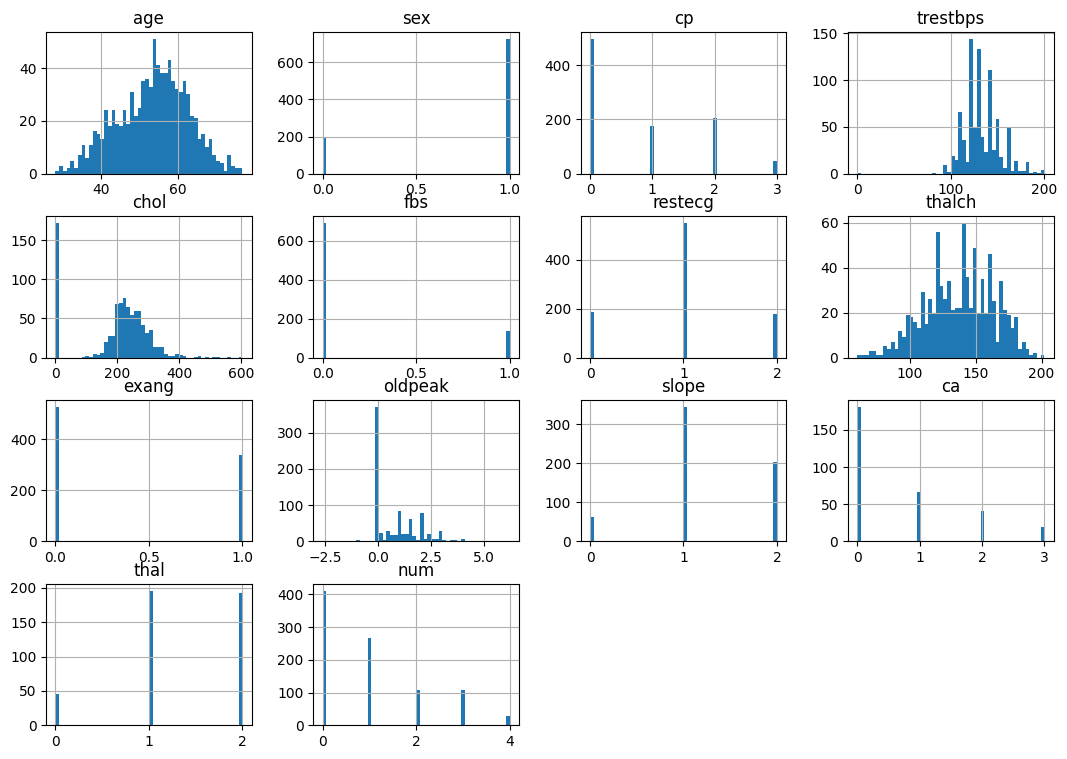

In [ ]:
df.hist(bins=50, figsize=(13,9))
plt.show()

### Korelatsiyalarni ko'rish

In [ ]:
corr_matrix = df.corr(numeric_only=True)

In [ ]:
corr_matrix["num"].sort_values(ascending=False)

,num
num,1.000000
ca,0.516216
oldpeak,0.443084
exang,0.388408
age,0.339596
sex,0.259342
thal,0.224497
fbs,0.155533
trestbps,0.122291
restecg,0.034603


In [ ]:
corr_matrix.style.background_gradient(cmap="coolwarm")

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
age,1.000000,0.056889,-0.076519,0.244253,-0.086234,0.233726,-0.006635,-0.365778,0.201626,0.258243,-0.155032,0.370416,0.105194,0.339596
sex,0.056889,1.000000,-0.125933,0.001087,-0.197281,0.089191,0.072163,-0.179320,0.181420,0.103930,-0.125154,0.094123,0.162838,0.259342
cp,-0.076519,-0.125933,1.000000,-0.023508,0.065279,-0.006408,-0.070407,0.300812,-0.370214,-0.181486,0.173409,-0.199452,-0.165319,-0.314518
trestbps,0.244253,0.001087,-0.023508,1.000000,0.092853,0.160235,0.016085,-0.104899,0.152328,0.161908,-0.063387,0.093705,0.083563,0.122291
chol,-0.086234,-0.197281,0.065279,0.092853,1.000000,0.024847,-0.201947,0.236121,-0.034557,0.047734,0.059276,0.051606,-0.087733,-0.231547
fbs,0.233726,0.089191,-0.006408,0.160235,0.024847,1.000000,0.042946,-0.053386,0.029176,0.055277,-0.092142,0.149539,-0.018127,0.155533
restecg,-0.006635,0.072163,-0.070407,0.016085,-0.201947,0.042946,1.000000,-0.174780,0.061871,-0.032772,-0.097082,-0.114783,-0.048919,0.034603
thalch,-0.365778,-0.179320,0.300812,-0.104899,0.236121,-0.053386,-0.174780,1.000000,-0.356439,-0.151174,0.360622,-0.264094,-0.144017,-0.366265
exang,0.201626,0.181420,-0.370214,0.152328,-0.034557,0.029176,0.061871,-0.356439,1.000000,0.392492,-0.319424,0.127385,0.234880,0.388408
oldpeak,0.258243,0.103930,-0.181486,0.161908,0.047734,0.055277,-0.032772,-0.151174,0.392492,1.000000,-0.421184,0.281817,0.159708,0.443084


### Malumotlarni tozalash

In [ ]:
df["trestbps"].fillna(df["trestbps"].mean(), inplace=True)
df["chol"].fillna(method="ffill", inplace=True)
df["fbs"] = df["fbs"].fillna(0)
df.drop("restecg", axis=1, inplace=True)
df["thalch"] = df["thalch"].fillna(df["thalch"].mean())
df['exang'] = df["exang"].fillna(df["exang"].mean())
df["oldpeak"].fillna(method="ffill", inplace=True)
df["slope"].fillna(method="ffill", inplace=True)
df["thal"].fillna(method="ffill", inplace=True)
df["ca"].fillna(method="ffill", inplace=True)

/tmp/ipython-input-72-3724026822.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["trestbps"].fillna(df["trestbps"].mean(), inplace=True)
/tmp/ipython-input-72-3724026822.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

Endi yana qiymatlarni ko'rib chiqamiz

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 920 entries, 1 to 920
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  920 non-null    float64
 4   chol      920 non-null    float64
 5   fbs       920 non-null    float64
 6   thalch    920 non-null    float64
 7   exang     920 non-null    float64
 8   oldpeak   920 non-null    float64
 9   slope     920 non-null    float64
 10  ca        920 non-null    float64
 11  thal      920 non-null    float64
 12  num       920 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 100.6 KB


In [ ]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix["num"].sort_values(ascending=False)

,num
num,1.000000
oldpeak,0.411695
exang,0.372279
age,0.339596
sex,0.259342
thal,0.214458
ca,0.178502
fbs,0.129539
trestbps,0.116225
chol,-0.228222


# Model qurish

#### Train / test set

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.1, random_state=42)

In [ ]:
train_set.shape

(828, 13)

In [ ]:
test_set.shape

(92, 13)

## Simple Linear Regression

In [ ]:
X_train = np.asanyarray(train_set[["exang"]])
y_train = np.asanyarray(train_set[["num"]])

In [ ]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

LinearRegression()

Predict

In [ ]:
X_test = np.asanyarray(test_set[["exang"]])
y_test = np.asanyarray(test_set[["num"]])

In [ ]:
y_pred = LR_model.predict(X_test)

R² ,RMSE and MAE





In [ ]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

r2_score = r2_score(y_test, y_pred)    # model bizning num ustustunimizni qanchalik darajada tushinganini ko'rsatadi,(0 va 1)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(root_mean_squared_error(y_test, y_pred))
print("R²:", r2_score, "\nMAE:", mae, "\nRMSE", rmse)

R²: 0.11740224960240897 
MAE: 0.9203346939099921 
RMSE 1.0645238461489681


In [ ]:
print(y_pred.min(), y_pred.max())
print(np.unique(np.round(y_pred)))


0.6283016640296417 1.516946561816706
[1. 2.]


In [ ]:
predicted = pd.DataFrame({
    'asl qiymat':y_test.flatten(),
    "bashorat":y_pred.round().astype(int).flatten()
})

In [ ]:
predicted.head()

,asl qiymat,bashorat
0,0,1
1,0,1
2,1,2
3,3,1
4,1,1


In [ ]:
predicted["bashorat"].value_counts()

,count
bashorat,
1,59
2,33


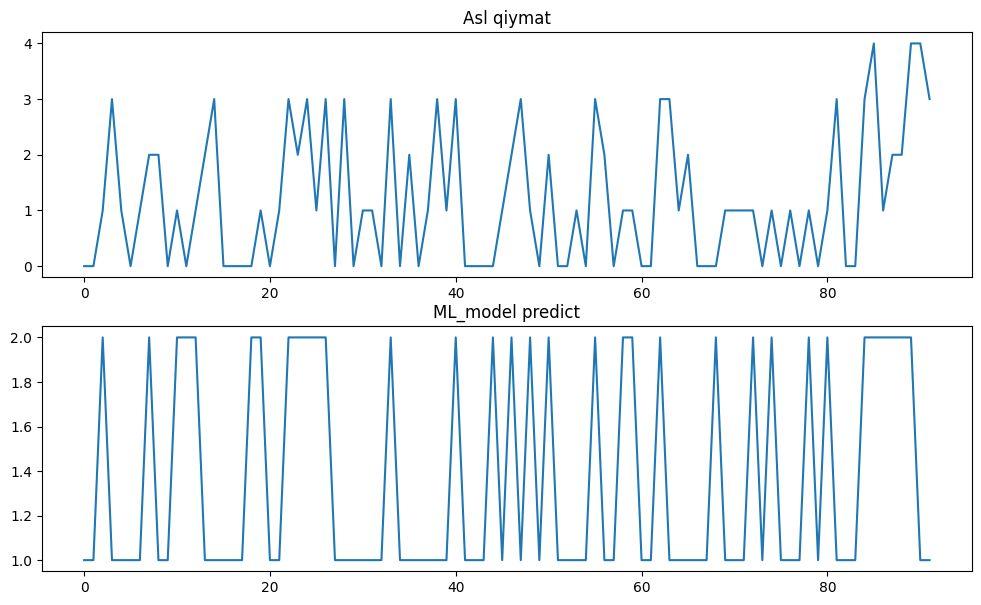

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(12,7))
ax[0].plot(predicted['asl qiymat'])
ax[1].plot(predicted['bashorat'])
ax[0].set_title("Asl qiymat")
ax[1].set_title("ML_model predict")
plt.show()

## Multiple Linear Regression

In [ ]:
# X_train = np.asanyarray(train_set[["age","exang","oldpeak","thal","ca","fbs","thalch","cp","slope","sex"]])
X_train = np.asanyarray(train_set[["age","exang","oldpeak","thal","ca","fbs"]])
# X_train = np.asanyarray(train_set[["sex","exang","oldpeak","thal","ca","chol"]])
y_train = y_train.copy()

In [ ]:
MLR_model = LinearRegression()
MLR_model.fit(X_train, y_train)

print('Coefficients: ', MLR_model.coef_)
print('theta0:', MLR_model.intercept_)

Coefficients:  [[0.02007259 0.5672167  0.25821992 0.16180916 0.22916081 0.14448482]]
theta0: [-0.90225081]


<Figure size 1200x700 with 0 Axes>

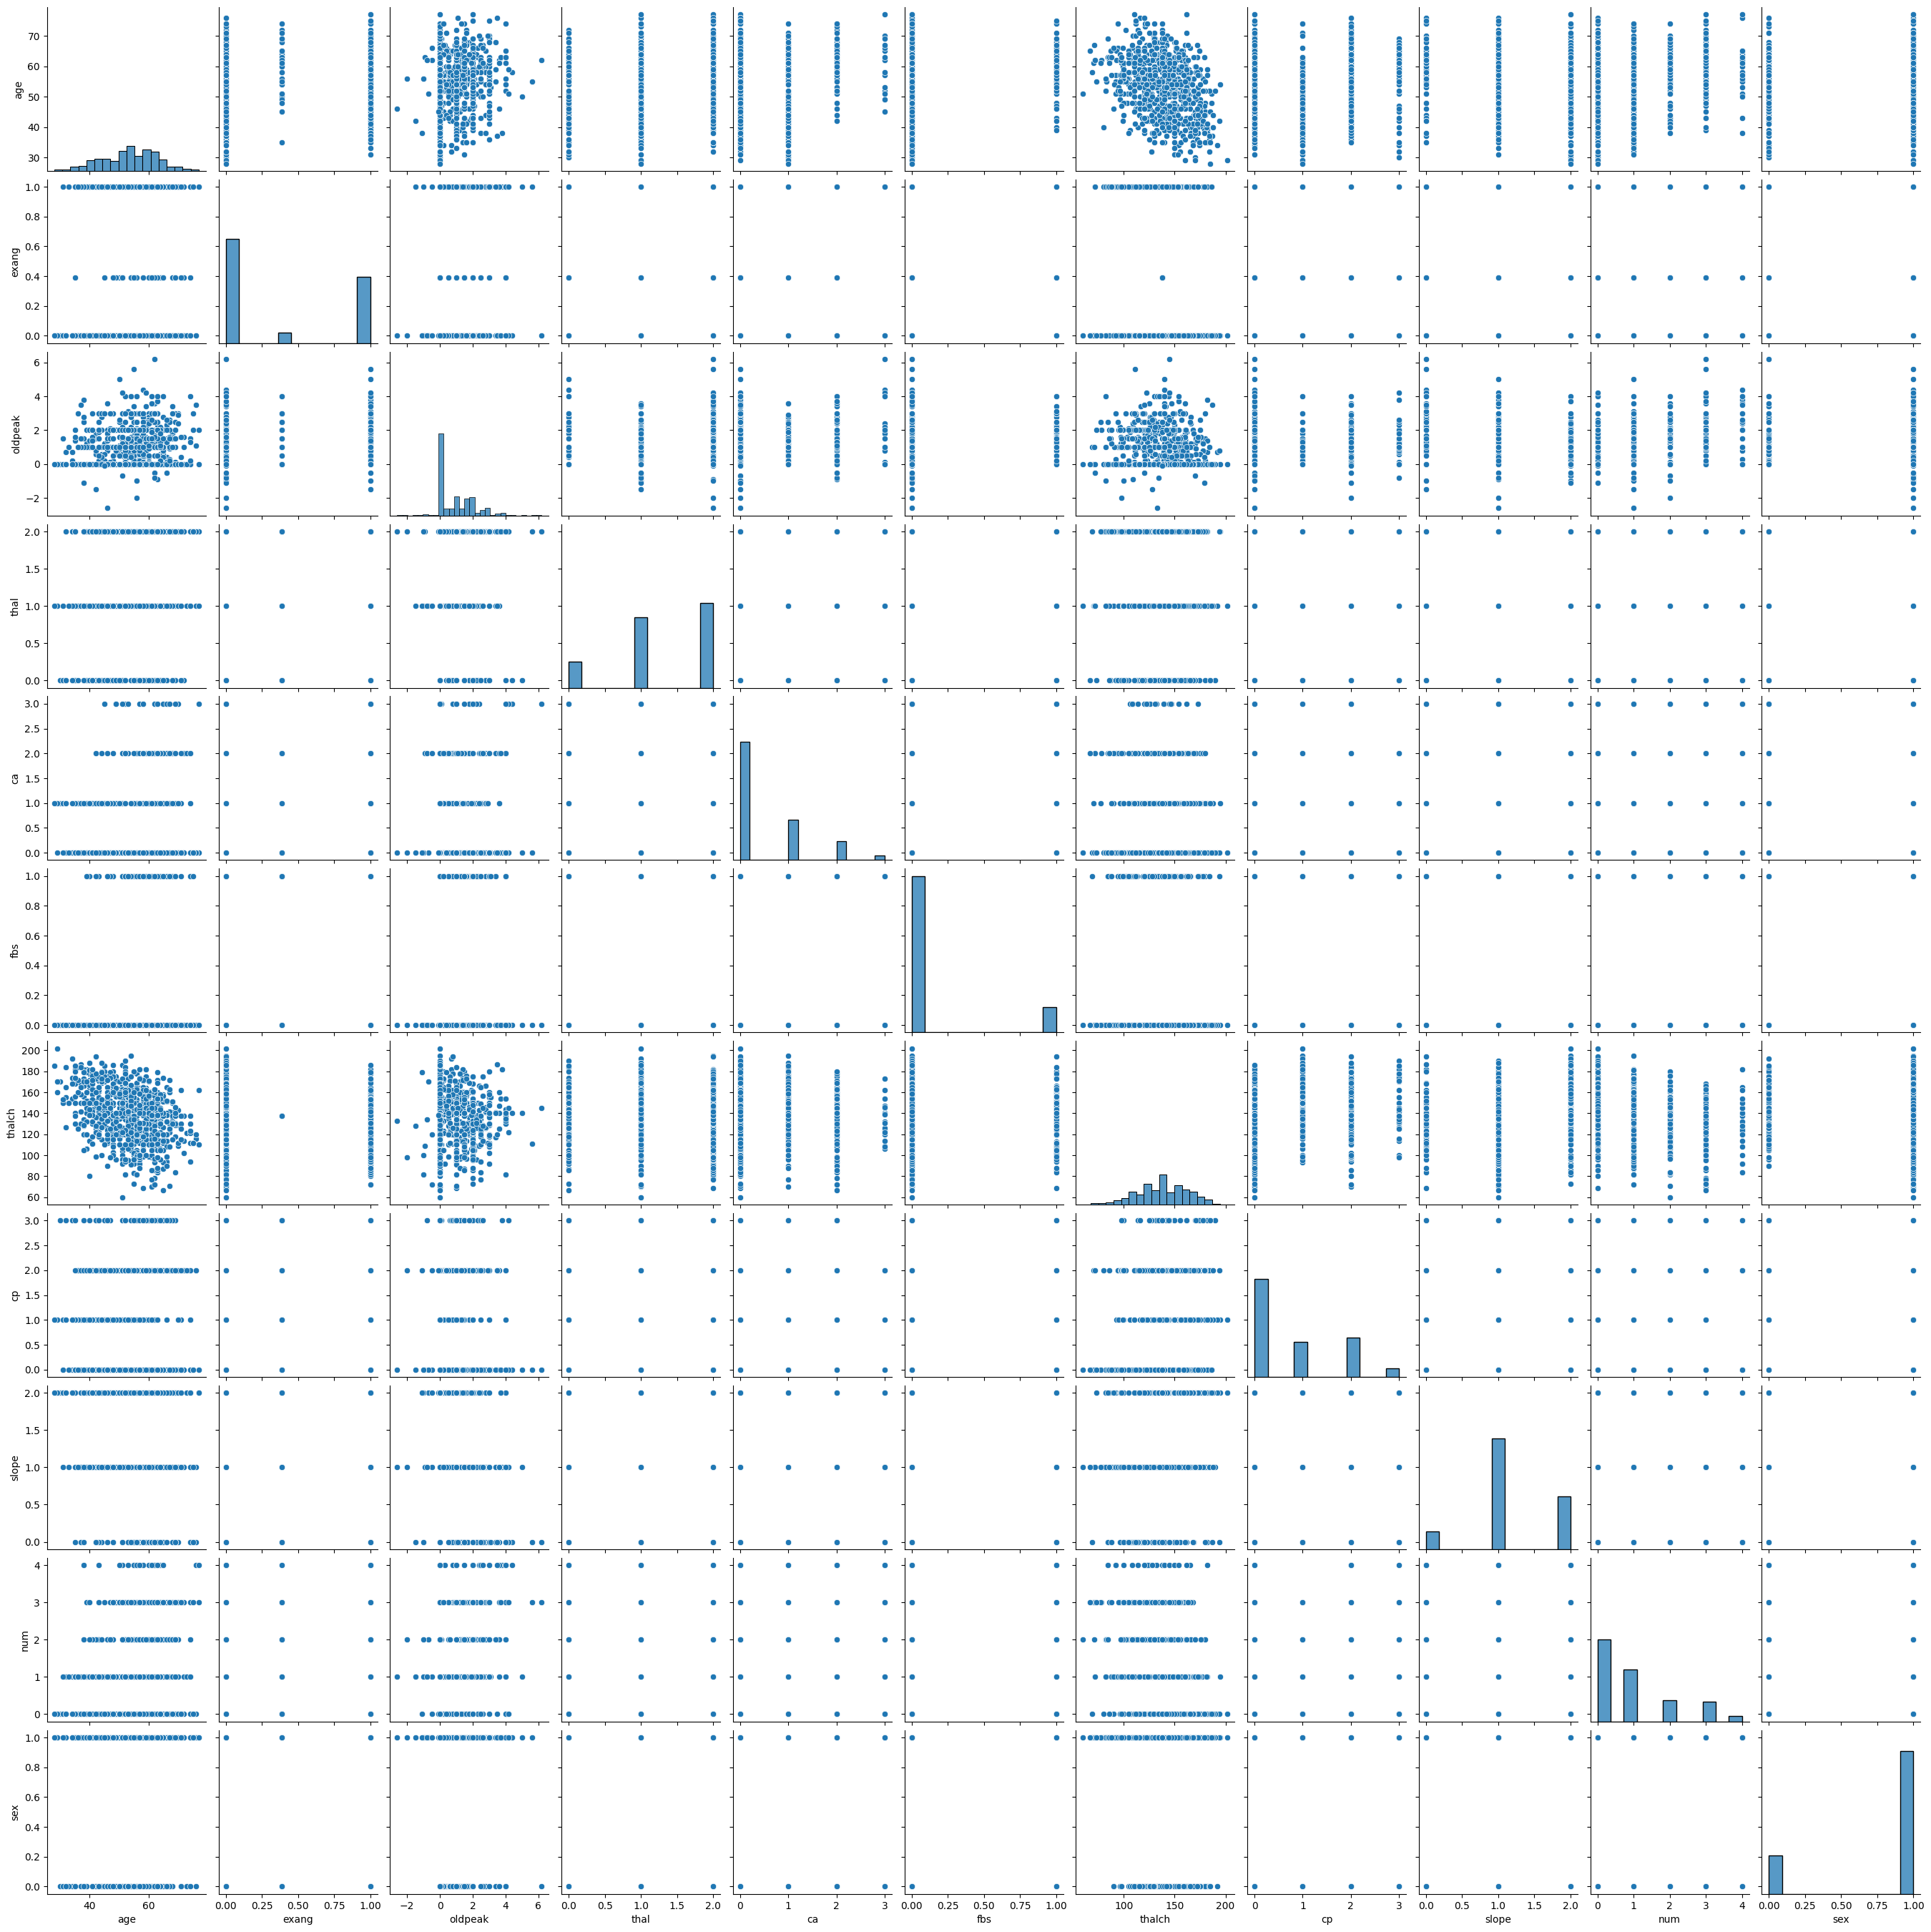

In [ ]:
plt.figure(figsize=(12,7))
sns.pairplot(train_set[["age","exang","oldpeak","thal","ca","fbs","thalch","cp","slope","num","sex"]])
plt.show()

#### Predict

In [ ]:
# X_train = np.asanyarray(test_set[["age","exang","oldpeak","thal","ca","fbs","thalch","cp","slope"]])
X_test = np.asanyarray(test_set[["age","exang","oldpeak","thal","ca","fbs"]])
# X_test = np.asanyarray(test_set[["sex","exang","oldpeak","thal","ca"]])
y_test = y_test.copy()

In [ ]:
y_pred = MLR_model.predict(X_test)

R², RMSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

r2_score = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(root_mean_squared_error(y_test, y_pred))
print("R²:", r2_score, "\nMAE:", mae, "\nRMSE", rmse)

R²: 0.32842162030097277 
MAE: 0.7598726430373952 
RMSE 0.9942345866365586


In [ ]:
predicted = pd.DataFrame({
    'asl qiymat':y_test.flatten(),
    "bashorat":y_pred.round().astype(int).flatten()
})

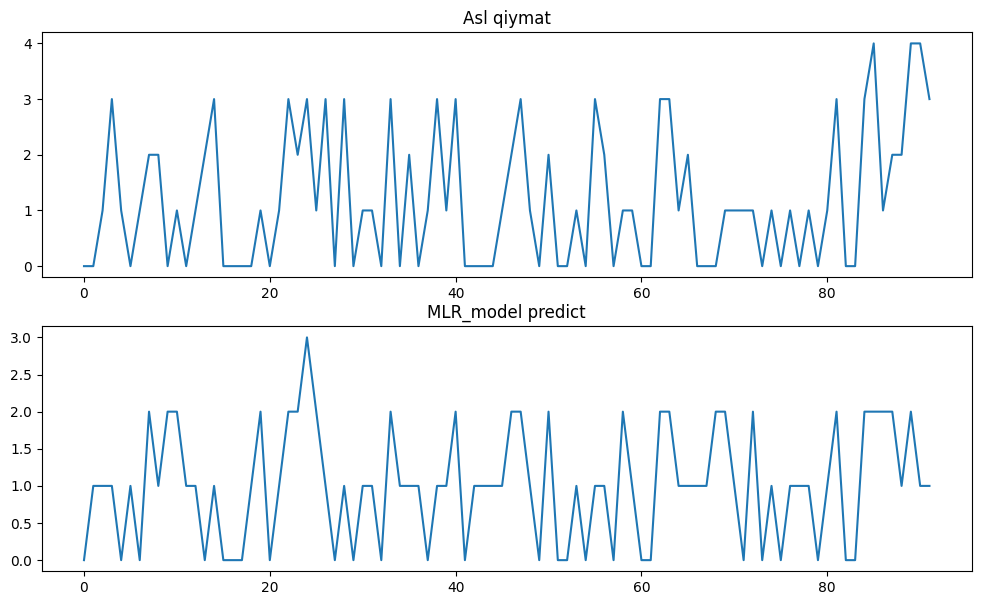

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(12,7))
ax[0].plot(predicted['asl qiymat'])
ax[1].plot(predicted['bashorat'])
ax[0].set_title("Asl qiymat")
ax[1].set_title("MLR_model predict")
plt.show()

## Polynominal Regression

In [ ]:
X_train = np.asanyarray(train_set[["oldpeak"]])
y_train = np.asanyarray(train_set[["num"]])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=1, include_bias=False)
X_poly = poly_features.fit_transform(X_train)

In [ ]:
LR_model.fit(X_poly, y_train)

LinearRegression()

Predict

In [ ]:
X_test = np.asanyarray(test_set[["oldpeak"]])
y_test = np.asanyarray(test_set[["num"]])

In [ ]:
X_test_poly = poly_features.transform(X_test)
yhat = LR_model.predict(X_test_poly)


In [ ]:
X_test = np.asarray(test_set[["exang"]])
X_test_poly = poly_features.transform(X_test)
yhat = LR_model.predict(X_test_poly)


In [ ]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
mae = mean_absolute_error(y_test, yhat)
rmse = np.sqrt(root_mean_squared_error(y_test, yhat))
r2_score = r2_score(y_test, yhat)
print("R²:", r2_score, "\nMAE:", mae, "\nRMSE", rmse)

R²: -0.02529228240342163 
MAE: 0.9236387632015329 
RMSE 1.1051637018753895


## None Linear Regression

### $$ \hat{Y} = \frac1{1+e^{-\beta_1(X-\beta_2)}}$$

In [ ]:
X_train = np.asanyarray(train_set[["oldpeak"]])
y_train = np.asanyarray(train_set[["num"]])

In [ ]:
def sigmoid(X, Beta1, Beta2):
  y = 1/(1+np.exp(-Beta1*(X-Beta2)))
  return y

In [ ]:
from scipy.optimize import curve_fit

beta, pcov = curve_fit(sigmoid, X_train.flatten(), y_train.flatten())
print("Beta1:",beta[0], "\nBeta2:", beta[1])

Beta1: 2.8032171096258973 
Beta2: -0.09093100761690631


In [ ]:
X_test = np.asanyarray(test_set[["oldpeak"]])
y_test = np.asanyarray(test_set[["num"]])

In [ ]:
yhat = sigmoid(X_test, *beta)

In [ ]:
print(f"Mean Absolute Error: {mean_absolute_error(y_test, yhat)}")

Mean Absolute Error: 0.912564968546651


### $$ \hat{Y} = \frac1{1+e^{-X}}$$


In [ ]:
def sigmoid2(X):
  y = 1/(1+np.exp(-X))
  return y

In [ ]:
yhat2 = sigmoid2(X_test)

In [ ]:
print(mean_absolute_error(y_test, yhat2))

0.9550058213473377


## Modelni tanlash

Hozir Multiple Linear Regression modeli qolgan modellardan yaxshiroq  natija berdi

In [ ]:
import joblib
filename = "my_model.jbl"
joblib.dump(MLR_model, filename)

['my_model.jbl']